# Policing Habits of the Chapel Hill, North Carolina Police Department (2011-2018)

### Sandra Keta - Faith Camp - Samantha Wells - Connor Nelson

## Background / Demographics of Chapel Hill

The city of Chapel Hill, North Carolina has a population of 60,988 residents. The majority of the population is between 18 and 24 years old, 31.5%. This is a result of the large student population that occupys the city, with UNC being a centered their as well. Residents under 18 make up 17% of the population, residents 65 years and older make up 10% of the population. The population proportion has only 87.2 men to every 100 women, and the median age is 25.6 years old. Despite this being the most educated city in North Carolina, with 77% of residents holding at least an associates degree, close to 20% of the population living in the city are designated below the federal poverty line.

Chapel Hill has a relatively diverse population within the city limits. 72.53% of Chapel Hill residents are While, with the next largest population group being the Asian Demographic, at 12.66%. The rest of the demographics follow as: Black or African American - 9.74%, Mixed - 3.28%, Other - 1.40%, Native American - 0.37%, Pacific Islander - 0.02%. The largest portion of the population is white, with Asian coming in second, and African American being the third largest population. Regardless, the White population is 8 times larger than the African American Population.

The dataset that our group is working with is the arrest data of Chapel Hill, North Carolina from the years 2010 to 2016. Features include the date and time the arrest was made, as well as the address of the arrest. The crime committed is given to us as a classification of a felony or a misdemeanor, a UCR code, and a short description of the crime. The arrestee is described with features of age, race, sex, and ethnicity. The dataset has 18,809 rows and 11 features (columns).

## DEMOGRAPHIC OF THE POLICE DEPARTMENT IN CHAPEL HILL, NORTH CAROLINA

In [1]:
import numpy as np                 
import pandas as pa                  
import matplotlib.pyplot as plt      
import seaborn as sn 

In [2]:
ped = pa.read_csv('/Users/sandraketa/desktop/police-employee-demographics.csv', sep = ';')

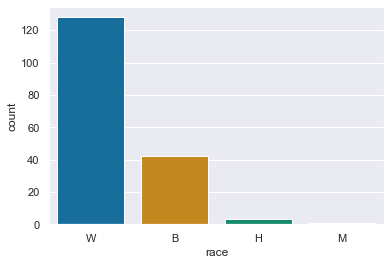

In [3]:
sn.set(style="darkgrid")
COUNT_RACE = sn.countplot(x="race", data=ped, palette = "colorblind")

## INITIAL GRAPHS

In [4]:
pam = pa.read_csv('/Users/sandraketa/desktop/Data_Analysis-Group-Project/police-arrests-made.csv', sep = ';')

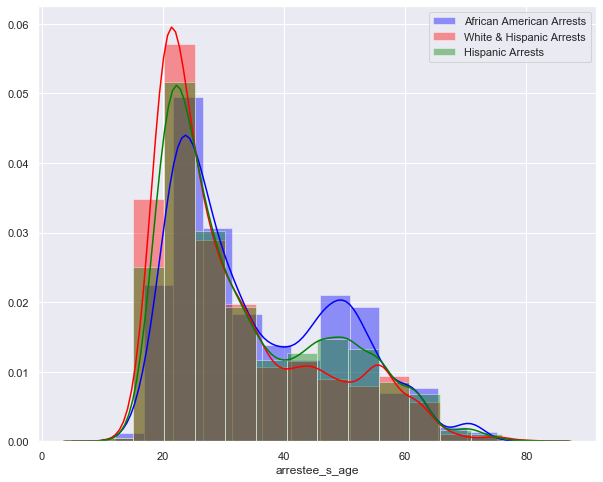

In [6]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='African American Arrests', kde=True, bins=14) 

sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='White & Hispanic Arrests', kde=True, bins=14)

sn.distplot(pam[pam.arrestee_ethnicity!='H'].arrestee_s_age, color='green', 
            label='Hispanic Arrests', kde=True, bins=14)

plt.legend();

## MANIPULATING THE DATA

In [7]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

These are the attributes for race. A for Asian, B for Black (African American), H for Hispanic, I for Indian (Native American), O for Other, U for Unknown, W for White, and nan for missing data.

Violent Crime Codes:

    0110 - Murder-First Degree-Attempt
    0640 - B&E-Vehicle
    0200 - Rape 1st Degree
    0300 - Common Law Robbery
    0410 - Assault Inflicting Serious Injury
    0411 - Assault LEO & Inflicting Injury
    0510 - B&E Misdemeanor
    0810 - Assault & Battery
    0811 - Assault on Government Official
    0820 - Communicate Threats
    1530 - Carrying Concealed Weapon Illegally
    1550 - Discharging Firearm/ BB Gun
    1590 - Possessing Weapon of Mass Destruction
    1710 - Peeping
    1720 - Crime against Nature
    1730 - Indecent Exposure
    1770 - Statutory Rape/Sex Offense
    1780 - Child Indecent Liberties
    2030 - Contributing to the Delinquency of a Minor
    2090 - Assault on a Female
    2100 - Impaired Driving DWI
    2212 - Inderage Possession of Spiritious Liquor
    2214 - Open Container
    2222 - Underage Possession
    2223 - Driver Consuming
    2230 - Aid & Abet Underage Alcohol Usage
    2240 - Consuming ON OFF Premises
    2290 - Consuming on Unauthorized Premises
    2410 - Disorderly Conduct
    2430 - Fighting
    2440 - Failure to Disperse
    2450 - Drunk/Dispruptive
    2490 - False Imprisonment
    2520 - Dissemination of Obscene Material to a Minor (Under 16)
    2570 - Exploiting Child
    2590 - Performing Harmful or Obscene acts in front of a minor
    2620 - Kidnapping
    2630 - Resising Arrest
    2640 - Violating Domestic Violence Protective Order
    2650 - Obstructing LEO Work
    2660 - Parole Violation
    2670 - 2nd Degree Trespassing
    2680 - Public Urination
    2690 - Fugitive
    4010 - Driving While License Revoked
    
    
Property Crime Codes:

    0620 - Larceny from person
    0630 - Larceny (Switch Price Tag)
    0670 - Break Coin Machine
    0690 - Larceny All other
    0710 - MV Theft - Automobile
    0900 - Arson 1st Degree
    1015 - Forgery-Uttering
    1027 - Counterfeiting
    1110 - Fraud - Worthless Check
    1120 - Possession of Fraudulent ID
    1140 - Unauthorized use of Conveyance
    1150 - Credit Card Fraud
    1170 - Identity Theft
    1180 - Accessing Computers
    1190 - Manufacturing Fraudulent Forms of ID
    1210 - Embezzlement
    1290 - Larceny by Employees
    1310 - Recreational Stolen Goods
    1320 - Larceny from Person
    1330 - Possession of Stolen Goods
    1400 - Damage-Personal Property
    2020 - Non-Support Child
    9910 - Littering
    
Narcotic Crime Codes:

    1810 - Poss Narcotics
    1820 - Drugs-Counterfeit
    1834 - Drug Paraphernalia
    1890 - Drugs on School Property

In [8]:
# code for changing the ucr_code feature to be coded as either Violent Crime, Property Crime, or Narcotic Crime
# based on the information above

pam_dict1 = {x:'Violent Crime' for x in list(set(pam.ucr_code))
             if x in [110,640,200,300,410,411,510,810,811,820,1530
                      ,1550,1590,1710,1720,1730,1770,1780,2030,2090,2100,2212,
                      2214,2222,2223,2230,2240,2290,2410,2430,2440,2450,2490,
                      2520,2570,2590,2620,2630,2640,2650,2670,2680,2690,4010]}
pam_dict2 = {x:'Property Crime' for x in list(set(pam.ucr_code)) 
             if x in[620,630,670,690,710,900,1015,1027,1110,1120,1140,1150,1170,1180,1190,1210,1290,1310,1320,
                      1330,1400,2020]}
pam_dict3 = {x:'Narcotic Crime' for x in list (set(pam.ucr_code))
             if x in [1810,1820,1834,1890]}

pam_dict1.update(pam_dict2)

pam_dict1.update(pam_dict3)

pam_2 = pam.copy()   
    
pam_2.ucr_code = pam_2.ucr_code.map(pam_dict1) 

In [9]:
set(pam_2.ucr_code)

{'Narcotic Crime', 'Property Crime', 'Violent Crime', nan}

In [10]:
# code for changing the ucr_code to be either 0 (Violent Crime), 1 (Property Crime), or 2 (Narcotic Crime)

pam_2_dict4 = {x: 0 for x in list(set(pam_2.ucr_code))
             if x in ['Violent Crime']}
pam_2_dict5 = {x: 1 for x in list(set(pam_2.ucr_code)) 
             if x in['Property Crime']}
pam_2_dict6 = {x: 2 for x in list (set(pam_2.ucr_code))
             if x in ['Narcotic Crime']}

pam_2_dict4.update(pam_2_dict5)

pam_2_dict4.update(pam_2_dict6) 

pam_3 = pam_2.copy()   
    
pam_3.ucr_code = pam_3.ucr_code.map(pam_2_dict4)

In [11]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

In [12]:
# code for one-hot-encoding the race feature to be numerical rather than categorical 

def onehot(df, feature):

    pamv = list(set(df[feature])) 
    
    for c in df.index: 
        t = df.loc[c, feature]
        
        for test in pamv:
            if pa.isna(test): 
                if pa.isna(t):
                    df.loc[c, '{}_nan'.format(feature)] = 1
                else:
                    df.loc[c, '{}_nan'.format(feature)] = 0
            else:
                if t == test:
                    df.loc[c, '{}_{}'.format(feature, test)] = 1  
                else:
                    df.loc[c, '{}_{}'.format(feature, test)] = 0 
            
    return df.drop(feature, axis=1)

In [13]:
pam_hot1 = onehot(pam_3, 'arrestee_s_race')

### VISUALIZATION OF THE MANIPULATED DATA

In [35]:
temp = pam_3.groupby('ucr_code').arrestee_s_race.value_counts().unstack(0)
temp

ucr_code,0.0,1.0,2.0
arrestee_s_race,,,
A,359.0,29.0,56.0
B,6316.0,1268.0,1085.0
H,81.0,3.0,12.0
I,38.0,4.0,6.0
O,10.0,2.0,NaN
U,1.0,NaN,NaN
W,7217.0,975.0,1155.0


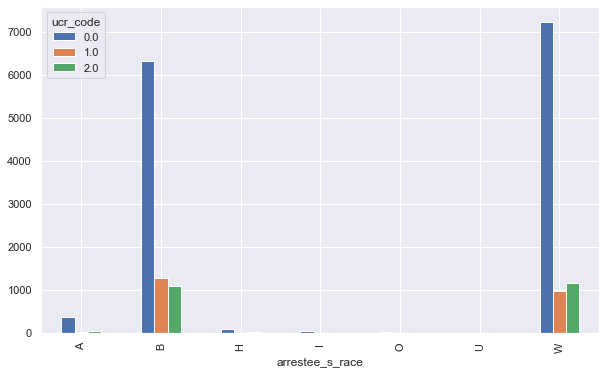

In [36]:
fig, ax = plt.subplots( figsize = (10,6))
temp.plot.bar(ax = ax)

In [39]:
pam_2_Count = pam_2.loc[:, ['ucr_code', 'arrestee_s_race']]
pam_2_Count.loc[:, 'COUNT'] = 1
pam_2_Count = pam_2_Count.groupby(['ucr_code', 'arrestee_s_race']).sum()   
    
pam_2_Count

COUNT
ucr_code       arrestee_s_race       
Narcotic Crime A                   56
               B                 1085
               H                   12
               I                    6
               W                 1155
Property Crime A                   29
               B                 1268
               H                    3
               I                    4
               O                    2
               W                  975
Violent Crime  A                  359
               B                 6316
               H                   81
               I                   38
               O                   10
               U                    1
               W                 7217

## MODELS, CROSS-VALIDATING/BOOTSTRAPPING, AND VISUALIZATION OF THE MODELS